              mean  count
fico_bin                 
0         0.720930    129
1         0.392736   1762
2         0.166792   5336
3         0.066461   2588
4         0.021622    185


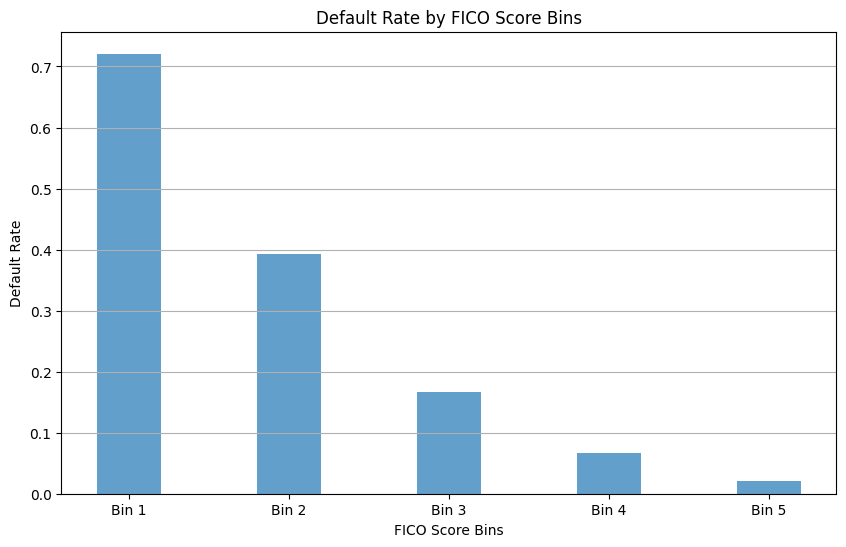

In [6]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

# Define the number of buckets
num_buckets = 5

# Calculate bin boundaries for equal-width bins
fico_scores = df['fico_score']
min_score = fico_scores.min()
max_score = fico_scores.max()
bin_width = (max_score - min_score) / num_buckets

# Calculate bin boundaries
bins = [min_score + i * bin_width for i in range(num_buckets)]
bins.append(max_score)  # Include the maximum score in the last bin

# Function to map FICO scores to bins
def map_fico_to_bin(score):
    for i in range(len(bins) - 1):
        if bins[i] <= score < bins[i + 1]:
            return i
    return len(bins) - 2  # In case score equals max_score, return the last bin index

# Apply binning to create a new column 'fico_bin'
df['fico_bin'] = df['fico_score'].apply(map_fico_to_bin)

# Verify the distribution of default probabilities across bins
bin_stats = df.groupby('fico_bin')['default'].agg(['mean', 'count'])
print(bin_stats)

# Optionally, visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(bin_stats.index, bin_stats['mean'], width=0.4, align='center', alpha=0.7)
plt.xlabel('FICO Score Bins')
plt.ylabel('Default Rate')
plt.title('Default Rate by FICO Score Bins')
plt.xticks(range(num_buckets), [f'Bin {i+1}' for i in range(num_buckets)])
plt.grid(axis='y')
plt.show()
